# **🔗 Objetivos**

Esse notebook tem como objetivo a avaliação para o processo seletivo de **Instutor de Mentoria** na **Resilia Educação**.

Tendo em vista o escopo da vaga, os processos realizados nos dados serão acompanhados de dicas, instruções do que está

sendo realizado.

# <b style="color:#f87730"> 🧰 Importando bibliotecas e o DataFrame. </b>

Como boa prática no nosso código, devemos começar importando as bibliotecas que serão utilizadas 

ao longo do código. Enquanto trabalhamos no projeto, podemos sentir a necessidade de "chamar" outras bibliotecas.

Se for o caso, devemos voltar aqui e adicioná-las abaixo, para que o fluxo de código se mantenha limpo e organizado,

e para uma fácil identificação das ferramentas utilizadas. 

In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Após isso, vamos ler o(s) conjunto(s) de dados que será utilizado, a partir da função **READ** do pandas.

O read conta com algumas variantes, a depender do tipo de arquivo lido. 

Neste caso, **read_csv** pois nossos arquivos estão no formato .csv.

In [2]:
# Ao rodar o código sem parâmetros (como o encoding), iremos nos deparar com um erro de decodificação de um caráctere.
# Pesquisando, podemos encontrar sua causa (caso não fosse conhecida) e sua solução.
# Nesse caso, apenas trocar o encoding nos dará o resultado desejado, e conseguiremos ler o arquivo:

data = pd.read_csv('Data/forest_fires.csv', encoding='latin-1')

# 🌎 **Visão geral e Tratamento dos dados**

## 🔷 Início

Nosso **DataFrame (DF)** tem poucas colunas, e fazendo sua chamada conseguimos visualizá-las:

In [3]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


Caso não fosse o caso, poderíamos ver todas a partir da propriedade **COLUMNS**:

In [4]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

O shape nos retorna uma **TUPLA** com o número de linhas e colunas do nosso DF:

In [5]:
data.shape

(6454, 5)

## 🔷 Tipos

Outra propriedade importante, a **DTYPES**, nos permite ver os nomes das colunas e os tipos de dados que elas armazenam.

É de extrema importância saber qual o tipo em que estão armazenados os nossos dados, para pensarmos na melhor

solução para os problemas que envolverão essas entradas em questões como **performance** e **tratamento dos dados**.

In [6]:
data.dtypes

year        int64
state      object
month      object
number    float64
date       object
dtype: object

Um exemplo claro disso é a coluna **date**, que atualmente está como object (string). Caso fosse utilizar essa coluna,

 ela seria mantida como **TIMESTAMP/DATETIME**, sendo transformada utilizando a função (to_datetime):

In [7]:
data['date'] = pd.to_datetime(data.date)
data['date'].head(5)


0   1998-01-01
1   1999-01-01
2   2000-01-01
3   2001-01-01
4   2002-01-01
Name: date, dtype: datetime64[ns]

Porém, se olharmos com um pouco mais de cuidado para essa coluna, vamos perceber sua redundância:

todos os meses nessa coluna estão como 01, inutilizando o seu propósito. Os dados podem ter sido

compilados de forma errada antes de serem enviados para o Kaggle ou para a própria fonte primária

de dados, que não está mais disponível de forma oficial.

In [8]:
data.date.dt.month.value_counts()

1    6454
Name: date, dtype: int64

Com isso, opto por remover esta coluna do nosso DF, já que suas informações já existem nas colunas "year" e "month":

> ❗ ATENÇÃO
>
>   Para a alteração ser atribuída e não apenas visualizada, devemos atribuir a operação (drop) a uma variável,
>
>   neste caso, o próprio DF. Pode ser feito como na atribuição abaixo, ou usando o parâmetro **INPLACE**, que apesar de funcionar,
>
>   é atualmente uma prática desencorajada pela própria documentação do Pandas.

In [9]:
data = data.drop("date", axis=1)

Continuando a troca dos tipos de dados, percebemos que a coluna "number" está no formato **FLOAT**, que serve para números decimais.

Porém, podemos passar essa coluna para **INT**, já que esperamos apenas valores inteiros (não existe "um incêndio e meio").

In [10]:
data.number = data.number.astype('int64')

# Visualizando a alteração:

data.dtypes

year       int64
state     object
month     object
number     int64
dtype: object

____

Agora, verificaremos se existem **dados duplicados**. Na linha de código abaixo,

selecionamos dentro do conjunto de dados aqueles dados que são duplicados,

e com o parâmetro Keep setado p/ False, podemos ter uma visão de todas entradas repetidas.

> ❗ Atenção
>
> O keep=False servirá apenas p/ a visualização, devemos lembrar de retirar o parâmetro
>
> ao realizar a remoção dos duplicados, caso contrário nenhum dos N registros repetidos
>
> permanecerá nos nossos dados.

In [11]:
data[data.duplicated(keep=False)]

,year,state,month,number
258,2017,Alagoas,Janeiro,38
259,2017,Alagoas,Janeiro,38
2391,1998,Mato Grosso,Janeiro,0
2411,1998,Mato Grosso,Fevereiro,0
2431,1998,Mato Grosso,Março,0
...,...,...,...,...
4841,1998,Rio,Abril,0
4861,1998,Rio,Maio,0
4864,2001,Rio,Maio,4
4910,2007,Rio,Julho,7


Ao trabalhar com esse conjunto de dados, percebi (e explico melhor em detalhes na seção <a href='#anomalia'>**Anomalias nos Dados**</a><a id='retorno'>,</a> um pouco abaixo).

esse fenômeno será demonstrado abaixo e será contornado levando em consideração a melhor solução possível, visando eliminar a menor

quantidade de dados relevantes.

In [12]:
data[data.duplicated(keep=False)].query('state == "Rio"')

,year,state,month,number
4303,1998,Rio,Janeiro,0
4323,1998,Rio,Fevereiro,0
4343,1998,Rio,Março,0
4346,2001,Rio,Março,0
4351,2006,Rio,Março,8
4363,1998,Rio,Abril,0
4369,2004,Rio,Abril,3
4374,2009,Rio,Abril,1
4383,1998,Rio,Maio,0
4386,2001,Rio,Maio,4


.query('state == "Rio"')

In [13]:
data = data.drop_duplicates()

In [14]:
# Verificando novamente, vemos que não existem mais valores duplicados:

data[data.duplicated(keep=False)]

,year,state,month,number


________

Outro ponto importante que devemos estar atentos são valores nulos e faltantes. Podemos determinar a sua quantidade da seguinte maneira:

Usamos o método .isnull(), que determinará uma variável booleana ao registro (False se o registro estiver preenchido, True caso esteja faltando)

Após isso, usamos outro método, o .sum() para realizar a contagem geral do total de registros faltantes. Caso exista algum registro faltante devemos observar

um número diferente de 0, e tomar as devidas providências para que nossas análises não sejam contaminadas ou atrapalhadas por ele.

In [15]:
# No conjunto de dados trabalhado, observamos que todos os valores existem e não há registros nulos, logo não será necessário nenhuma alteração aqui:

data.isnull().sum()

year      0
state     0
month     0
number    0
dtype: int64

____________

## 📅 Criando colunas de trimestres e meses inteiros

Conforme dito acima, a coluna Date não continha informações relevantes, já que sua única alteração era o ano. 

Porém ainda precisamos dos valores numéricos para ordenar os meses. Além disso, também dividirei em trimestres

os meses, para gerar gráficos no Power BI.

In [16]:
def nomeMes_Numeral(mes):
  # Transforma o nome do mês em seu correspondente numérico.
  
  dicionario_meses = {'Janeiro':1, 'Fevereiro':2,
                      'Março':3, 'Abril':4,
                      'Maio':5, 'Junho':6,
                      'Julho':7, 'Agosto':8,
                      'Setembro':9, 'Outubro':10,
                      'Novembro':11, 'Dezembro':12}
  
  return dicionario_meses.get(mes)

In [17]:
def mes_Trimestre(mesNum):
  # Classifica o trimestre de acordo com mês.
  
  # Essa classificação poderia ser feita através de uma função no PBI
  # mas optei por enviar o conjunto de dados totalmente funcional.

  return 'Q1' if 12/mesNum >= 4 else 'Q2' if 12/mesNum >= 2 else 'Q3' if 12/mesNum >=1.33 else 'Q4'

In [18]:
data['month_int'] = data.month.apply(lambda x: nomeMes_Numeral(x))

In [19]:
data['quarter'] = data.month_int.apply(lambda x: mes_Trimestre(x))

In [20]:
data

,year,state,month,number,month_int,quarter
0,1998,Acre,Janeiro,0,1,Q1
1,1999,Acre,Janeiro,0,1,Q1
2,2000,Acre,Janeiro,0,1,Q1
3,2001,Acre,Janeiro,0,1,Q1
4,2002,Acre,Janeiro,0,1,Q1
...,...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128,12,Q4
6450,2013,Tocantins,Dezembro,85,12,Q4
6451,2014,Tocantins,Dezembro,223,12,Q4
6452,2015,Tocantins,Dezembro,373,12,Q4


________

## 🔠 Corrigindo erros ortográficos

Aqui, identifico quais os estados estão com nomes reduzidos ou incorretos para facilitar a identificação dos mesmos pelo PBI.

Em seguida, crio um **Dicionário** contendo como chave os nomes incorretos e como valor os nomes certos.

In [21]:
data.state.unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [22]:
corrigidos = {'Amapa':'Amapá', 'Ceara':'Ceará', 'Espirito Santo':'Espírito Santo',
'Goias':'Goiás', 'Maranhao':'Maranhão', 'Paraiba':'Paraíba', 'Piau':'Piauí',
'Rio':'Rio de Janeiro', 'Rondonia':'Rondônia', 'Sao Paulo':'São Paulo'}

Após realizar esse trabalho manual, utilizo o método **REPLACE** do Pandas para substituir as chaves pelos valores corretos.

In [23]:
data = data.replace(corrigidos.keys(), corrigidos.values())

In [24]:
# Com isso, chamamos novamente o UNIQUE para ver se os dados foram substituídos corretamente.

data.state.unique()

array(['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará',
       'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraíba', 'Pernambuco',
       'Piauí', 'Rio de Janeiro', 'Rondônia', 'Roraima', 'Santa Catarina',
       'São Paulo', 'Sergipe', 'Tocantins'], dtype=object)

É importante atentar-se à falta de alguns estados no conjunto de dados. São eles:

> _Rio Grande do Norte; Rio Grande do Sul; Paraná e Mato Grosso do Sul._

Escreverei mais sobre isso na seção abaixo.

______

# 📣 <a id='anomalia' style="color:red">ANOMALIAS NOS DADOS</a>

Todos os plots e informações obtidas através dos dados nesse notebook <b style="color:red">NÃO</b> são representações fiéis da realidade devido a erros críticos nos dados.

> <a href='#retorno'>Voltar para seção de dados repetidos</a>

## ➿ Contexto

Ao separar os dados por estados verificamos a seguinte situação:

Os estados de Mato Grosso e Paraíba contam com 2x o número de registros normal, e Rio conta com 3x este número.

In [25]:
data.groupby('state').count()

,year,month,number,month_int,quarter
state,,,,,
Acre,239,239,239,239,239
Alagoas,239,239,239,239,239
Amapá,239,239,239,239,239
Amazonas,239,239,239,239,239
Bahia,239,239,239,239,239
Ceará,239,239,239,239,239
Distrito Federal,239,239,239,239,239
Espírito Santo,239,239,239,239,239
Goiás,239,239,239,239,239


Os dados fornecidos para cumprir o documento foram fornecidos através do Kaggle, compilados e enviados por um usuário contém algumas inconsistências.

Como visto acima, existem estados faltantes: _Rio Grande do Norte, Rio Grande do Sul, Paraná, Mato Grosso do Sul_. Muito provavelmente houve um erro

ao parsear e separar os dados, transformando-os em um dataset:

<li>"Rio" -> Rio de Janeiro, Rio Grande do Norte e Rio Grande do Sul</li>
<li>"Paraíba" -> Paraíba e Paraná</li>
<li>"Mato Grosso" -> Mato Grosso e Mato Grosso do Sul</li>

Os estados acima estão com informações **UNIDAS**. Em todos os casos, creio que o REGEX estava configurado de maneira incorreta:

<li>apenas para "Rio" e acabou apagando o restante do nome do estado.</li>
<li>possivelmente o "á" no final do nome Paraná fez com que o nome do estado acabasse sendo totalmente apagado,

e posteriormente preenchido como "Paraíba" através do método fillna(), já que estão sequencialmente posicionados.</li>
<li>semelhante ao "Rio", o REGEX desconsiderou parte da string</li>


## 🧨 **Implicações**:

Desta forma, os dados fornecidos estão **CRITICAMENTE** comprometidos, de forma que não é possível determinar com exatidão as informações dos seus

locais originais. Haverão estados com uma **anomalia** em seus números, e haverão gráficos com os estados faltantes no Power BI.


## **⭐ Fonte Primária**

Devido ao prazo de entrega desse material, não será possível realmente explorar a fundo a possibilidade de trabalhar com os dados primários,

mas ela estará presente a título de curiosidade: sempre busque uma alternativa para entender o problema. Tenha a curiosidade.

No próprio Kaggle podemos ver que o autor deixou o link para a fonte original dos dados:
  > https://dados.gov.br/dataset/sistema-nacional-de-informacoes-florestais-snif

  A página entretanto está fora do ar, com o código de erro 404, citando que a página pode não existir mais. E de fato ela foi desativada em 2021.
  
  Porém isso não vai impedir nosso acesso a esses dados. Utilizando a ferramenta "Wayback Machine" conseguimos ver instâncias do site salvas em momentos do passado.

  Nem todas as "capturas" do site são 100% funcionais, podendo encontrar algumas mais detalhadas e outras com apenas a frações do conjunto do site.

  Buscando um pouco percebemos que em 2018 houve um grande movimento de preservação de capturas do site, de forma que encontramos versões totalmente funcionais,

  onde até os links de download funcionam, apesar do mirror original não existir mais. Com isso, conseguimos chegar à seguinte captura da página:

  > https://web.archive.org/web/20181223043304/http://dados.gov.br/dataset/sistema-nacional-de-informacoes-florestais-snif/resource/949310f1-05bc-4f56-a63f-aef67aac6164

Através dela, podemos baixar o conjunto de dados original

In [40]:
carregando_originais = pd.read_csv('Data/rf_incendiosflorestais_focoscalor_estados_1998-2017.csv', delimiter="\r\t", engine='python', encoding='latin-1')
carregando_originais

,"""Ano\tEstado\tMês\tNúmero\tPeríodo"""
0,"""1998\tAcre\tJaneiro\t0\t01/01/1998"""
1,"""1999\tAcre\tJaneiro\t0\t01/01/1999"""
2,"""2000\tAcre\tJaneiro\t0\t01/01/2000"""
3,"""2001\tAcre\tJaneiro\t0\t01/01/2001"""
4,"""2002\tAcre\tJaneiro\t0\t01/01/2002"""
...,...
6449,"""2012\tTocantins\tDezembro\t128\t01/01/2012"""
6450,"""2013\tTocantins\tDezembro\t85\t01/01/2013"""
6451,"""2014\tTocantins\tDezembro\t223\t01/01/2014"""
6452,"""2015\tTocantins\tDezembro\t373\t01/01/2015"""


In [27]:
colunas_originais = carregando_originais.columns[0].split(sep='\t')
colunas_originais

['Ano', 'Estado', 'Mês', 'Número', 'Período']

In [28]:
originais_lista = carregando_originais.applymap(lambda x: x.split(sep='\t')).copy()
originais_lista

,Ano\tEstado\tMês\tNúmero\tPeríodo
0,"[1998, Acre, Janeiro, 0, 01/01/1998]"
1,"[1999, Acre, Janeiro, 0, 01/01/1999]"
2,"[2000, Acre, Janeiro, 0, 01/01/2000]"
3,"[2001, Acre, Janeiro, 0, 01/01/2001]"
4,"[2002, Acre, Janeiro, 0, 01/01/2002]"
...,...
6449,"[2012, Tocantins, Dezembro, 128, 01/01/2012]"
6450,"[2013, Tocantins, Dezembro, 85, 01/01/2013]"
6451,"[2014, Tocantins, Dezembro, 223, 01/01/2014]"
6452,"[2015, Tocantins, Dezembro, 373, 01/01/2015]"


In [29]:
dados_originais =pd.DataFrame(data=originais_lista['Ano\tEstado\tMês\tNúmero\tPeríodo'].to_list(), columns=colunas_originais)

In [30]:
dados_originais.dtypes

Ano        object
Estado     object
Mês        object
Número     object
Período    object
dtype: object

In [34]:
len(dados_originais.Estado.unique())

27

## **❓ Então, como proceder?**

Através do site WAYBACK MACHINE, conseguimos

> Tentei de diversas formas obter os dados da sua fonte PRIMÁRIA, mas aparentemente este segmento do portal de dados do governo foi descontinuado.

Mesmo utilizando sites como o WAYBACK MACHINE (https://web.archive.org/web/20181126222108/),

que disponibiliza um "mirror" do site, não é possível baixar os arquivos em si, pois seu endereço de origem não está mais disponível.

 Devido a isso, veremos um número desproporcional de ocorrências nesses estados (MATO GROSSO, RIO DE JANEIRO E PARAÍBA), o que

contaminará a análise, de forma que não podemos confiar totalmente nos dados. As ocorrências serão distribuídas de formas irreais que não

refletem a realidade. Algumas medidas poderiam ser tomadas para tentar "contornar" o problema, como atribuir a estes estados uma **MÉDIA**

de acordo com o cenário nacional, ou dividindo o número destes estados que contam com mais registros para o número "ideal" em cada estado,

mas isso não resolveria nosso problema, já que **CADA ESTADO POSSUI UMA PARTICULARIDADE CLIMÁTICA E SOCIAL**, de forma que ainda assim

estaríamos atribuindo números totalmente fora da realidade de cada estado.

# **🔍 Visualizando os dados limpos**

Seguindo com a visualização dos dados, podemos usar o método **DESCRIBE** para observar algumas das características das colunas numéricas do DF

In [29]:
data.describe()

,year,number,month_int
count,6421.000000,6421.000000,6421.000000
mean,2007.490734,108.773867,6.491668
std,5.732222,191.184606,3.441111
min,1998.000000,0.000000,1.000000
25%,2003.000000,3.000000,4.000000
50%,2007.000000,24.000000,7.000000
75%,2012.000000,114.000000,9.000000
max,2017.000000,998.000000,12.000000


A partir do describe, podemos ter uma visão das características gerais do DF:

1. Count - **Contagem de registros** (linhas) na coluna;

2. Mean - **Média da coluna**;

3. Std - **Desvio padrão da coluna** (podemos observar por exemplo que no **YEAR** o STD é baixo,

    pois os dados se concentram num período de apenas 19 anos de diferença, enquanto no NUMBER
    
    temos um STD muito mais alto, pois os dados variam entre 0 e 998 na coluna;

4. Min - **Valor mínimo** encontrado na coluna, menor registro;

5. 25% - **Primeiro Quartil** ou **Q1** (25% dos valores se encontram abaixo daqui);

6. 50% - **Segundo Quartil** ou **Q2** (50% dos valores estão abaixo daqui);

7. 75% - **Terceiro Quartil** ou **Q3** (75% dos valores estão abaixo daqui);

8. Max - **Valor máximo** encontrado na coluna, maior registro.

In [30]:
# Além dos quartis padrão vistos acima, podemos obter os dados que se encontram antes de uma porcentagem X%,
# utilizando o método QUANTILE, e dentro dele passando a porcentagem que desejamos como argumento: nesse caso, 60%

data.quantile(0.60)

year         2009.0
number         46.0
month_int       8.0
Name: 0.6, dtype: float64

Também podemos gerar gráficos que nos ajudam na visualização da distribuição dos dados, como o **BOXPLOT**.

Nesse caso, podemos ver os três quartis citados acima na **BARRA** do gráfico, sendo sua parte inferior o Q1,

a linha verde o Q2 e sua parte superior o Q3. Além disso, percebemos também uma linha que segue até um valor

que se aproxima de 275. Esses dados são considerados "normais" dentro da distribuição. Os pontos pretos são os **OUTLIERS**,

dados que não estão dentro da distribuição esperada da maioria dos dados. Porém, isso não quer dizer que devemos sempre

eliminar estes dados, ou que eles são um problema. Nesse caso, eles não afetarão nossas análises estatísticas nem os gráficos,

e por se tratarem de uma representação da realidade, serão mantidos no nosso conjunto de dados.

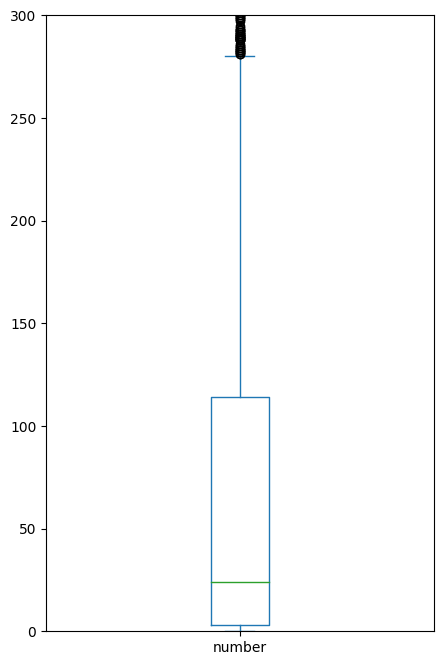

In [31]:
# Nestes dados os outliers (bolinhas pretas) vão até próximas do valor de 1000 se não limitarmos o tamanho do gráfico.
# Porém, para melhor visualização dos quartis em si, optei por limitar o range entre 0 e 300, onde começam a aparecer
# Os primeiros outliers. Os valores continuam existindo, apenas não estão destacados no gráfico.


data.number.plot(kind='box', figsize=(5,8))

plt.ylim(0,300)
plt.show()

Outro método para verificarmos essa distribuição é o **DISTPLOT**, da biblioteca **SEABORN**:

Notamos que ela não é uma Distribuição Padrão (Gaussiana/Bell Shaped), e sim uma distribuição

<b style="color:#1c87d9">**RIGHT SKEWED**</b>, ou seja, seus dados seguem o padrão de estarem altamente concentrados na parte DIREITA.

Isso se confirma quando observamos os valores da Moda, que vem primeiro (0), seguido da mediana (24) e em seguida, a Média (108)

Moda: 0;
Mediana: 24.0;
Média: 108.77386699890982


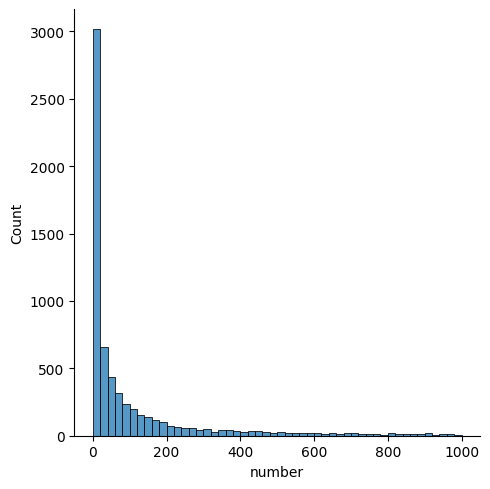

In [32]:
sns.displot(data, x='number', binwidth=20)

plt.plot()
print(f'Moda: {data.number.mode()[0]};\nMediana: {data.number.median()};\nMédia: {data.number.mean()}')


____________

# 📊 Plots

Após realizar a limpeza e visualização da distribuição dos nossos dados, partimos para o plot

de gráficos que nos forneçam mais informações sobre as ocorrências dos incêndios.

In [33]:
def colorindo_dados(entrada):
  # Aqui é feito a classificação de cores para exibir no

  color = 'crimson' if entrada > 40000 else 'GoldenRod' if entrada > 15000 else 'LemonChiffon'

  return f'background: {color}'

In [34]:
total_mais_recorrentes = data[['state', 'number']].groupby(by='state').sum().sort_values(by='number', ascending=False)
total_mais_recorrentes.style.applymap(colorindo_dados)


,number
state,
Mato Grosso,96178
Paraíba,52423
São Paulo,51118
Rio de Janeiro,45093
Bahia,44718
Piauí,37777
Goiás,37677
Minas Gerais,37453
Tocantins,33675


🛑 Caso não tenha lido a divisão de ATENÇÃO no notebook, favor retornar e ler. Não seria justo seguir com as visualizações abaixo

sem entender o motivo delas não refletirem corretamente a realidade.



No gráfico abaixo, podemos observar que o número TOTAL de incêndios é muito maior no agrupamento de estados do

Mato Grosso (MS e MT), primeiro colocado, do que no segundo colocado (PB e PR). Isso pode ser explicado por alguns fatores:

> Os estados do Mato Grosso estão entre as regiões mais quentes do Brasil, com uma temperatura média diária de 33 graus;
>
> Os estados são responsáveis por grandes produção agrícolas no país. É uma prática comum a utilização do fogo para "limpar" o terreno p/ plantio ou pós colheita;
>
> Nos meses mais quentes, a umidade relativa do ar no estado pode baixar consideravelmente, já que suas maiores reservas aquáticas (Pantanal) se concentram no sul do MT e norte do MS.

A união destes fatores faz com que esse agrupammento seja o campeão disparado no número total de queimadas, apesar de ter como "concorrentes" outros dois agrupamentos de estado,

representados pela Paraíba e Rio de Janeiro.

___

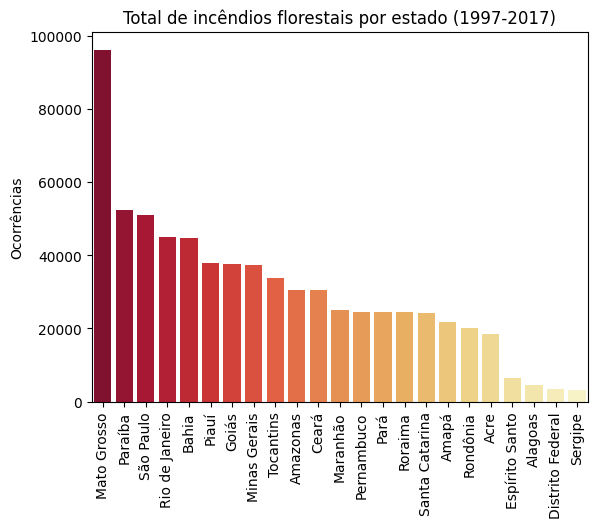

In [35]:
sns.barplot(data=total_mais_recorrentes, x=total_mais_recorrentes.index, y='number', palette='YlOrRd_r')

plt.xticks(rotation=90)
plt.title('Total de incêndios florestais por estado (1997-2017)')
plt.xlabel('')
plt.ylabel('Ocorrências')
plt.show()

___

Uma medida que pode nos aproximar um pouco mais da verdade, apesar de não ser ideal, é a média, já que ela irá dividir

o **VALOR DOS REGISTROS** pelo **NÚMERO DE LINHAS** em cada estado/agrupamento. Com isso, teremos um gráfico onde os

agrupamentos do MATO GROSSO, PARAÍBA E RIO DE JANEIRO ficam um pouco menos distoantes da realidade:

In [36]:
medias_mais_recorrentes = data.groupby('state').number.mean().sort_values(ascending=False).reset_index()

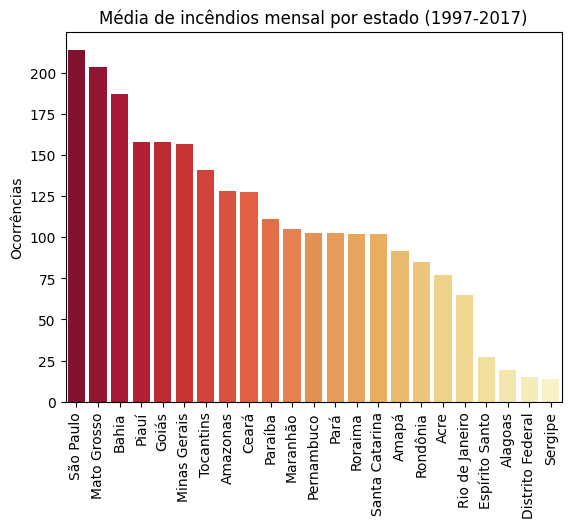

In [37]:
sns.barplot(data=medias_mais_recorrentes, x=medias_mais_recorrentes.state, y=medias_mais_recorrentes.number, palette='YlOrRd_r')

plt.xticks(rotation=90)
plt.title('Média de incêndios mensal por estado (1997-2017)')
plt.xlabel('')
plt.ylabel('Ocorrências')
plt.show()

___

In [38]:
anos_mais_freq = data.groupby('year').sum()
anos_mais_freq

,number,month_int
year,,
1998,19999,2046
1999,26869,2106
2000,27341,2106
2001,29039,2092
2002,37369,2106
2003,42737,2106
2004,38424,2102
2005,34984,2106
2006,33811,2103


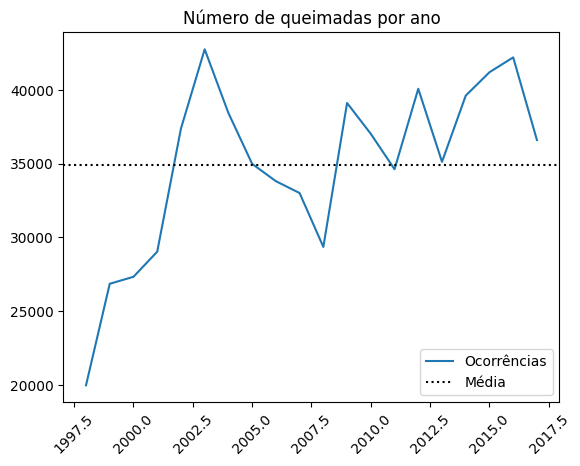

In [39]:
ax= sns.lineplot(anos_mais_freq, x=anos_mais_freq.index, y=anos_mais_freq.number, label='Ocorrências')

plt.axhline(anos_mais_freq.mean()[0], color='black', linestyle=':', label='Média')


plt.legend(loc='lower right')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.title('Número de queimadas por ano')

plt.show()

# 📤 Exportando dados limpos p/ usar no Power BI

Aqui, a partir do método **to_csv** do Pandas, exportamos nossos dados limpos para um novo arquivo, para ser usado no PBI.

In [40]:
data.to_csv('Data/dados_limpos.csv', index=False)

_____